In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
data = pd.read_csv("messy_expense_dataset.csv")

In [112]:
df = pd.DataFrame(data)

In [113]:
df.head()

,Date,Category,Amount,Payment_Mode
0,2025/02/19,Shopping,41201.81,Cash
1,Jan 07 2024,Shopping,43039.96,cash
2,Jun 03 2024,NaN,21515.17,Upi
3,Jun 03 2024,Health,21515.17,Upi
4,31-03-24,Dining,23419.00,NaN


In [114]:
df.shape

(1582, 4)

In [115]:
columns = list(df.columns)
print(columns)

['Date', 'Category', 'Amount', 'Payment_Mode']


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1582 non-null   object 
 1   Category      1430 non-null   object 
 2   Amount        1582 non-null   float64
 3   Payment_Mode  1435 non-null   object 
dtypes: float64(1), object(3)
memory usage: 49.6+ KB


In [117]:
# df[list(df.columns[df.isna().any()])].isna().sum()
df.isna().sum()

Date              0
Category        152
Amount            0
Payment_Mode    147
dtype: int64

In [118]:
df.duplicated().any()

np.True_

In [119]:
df.duplicated(keep=False).sum()

np.int64(146)

In [120]:
# get the duplicated data
df[df.duplicated()]

,Date,Category,Amount,Payment_Mode
47,19-04-24,Subscriptions,23215.93,Cash
54,2024-01-19,Groceries,29135.09,Cash
69,13-01-24,Entertainment,35184.52,Credit Card
79,May 20 2024,Dining,31004.91,Debit Card
120,2024/05/07,Entertainment,33846.80,upi
...,...,...,...,...
1486,2025-02-20,NaN,32400.50,cash
1491,14-01-25,Health,2383.66,Credit Card
1513,Jul 04 2024,entertaiment,30479.32,cash
1520,2024-01-03,Utilities,33226.19,Cash


In [121]:
df.drop_duplicates(inplace=True)

In [122]:
df.duplicated().any()

np.False_

In [123]:
df.isna().sum()

Date              0
Category        144
Amount            0
Payment_Mode    140
dtype: int64

Even after the removal of duplicated data we still have null values 


In [124]:
dates = df["Date"]

In [125]:
print(dates.head())
print(dates.tail())

0     2025/02/19
1    Jan 07 2024
2    Jun 03 2024
3    Jun 03 2024
4       31-03-24
Name: Date, dtype: object
1576       31-01-25
1577    Jan 22 2024
1578     2024-12-15
1579     2024-06-13
1581     2024/08/09
Name: Date, dtype: object


In [126]:
# Convert the Date column into proper datetime format.

# Any rows that fail conversion → remove them.

# Sort data by Date.

In [127]:
# optimized form of code: 
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df = df.dropna(subset=["Date"])

C:\Users\dipak\AppData\Local\Temp\ipykernel_21192\870472357.py:2: UserWarning: Parsing dates in %Y/%m/%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")


In [128]:
df.sort_values(by="Date", ascending=True, inplace=True)

In [129]:
print(df.head(3))
print(df.tail(3))

           Date       Category    Amount   Payment_Mode
382  2024-01-02  Entertainment   9496.55  Bank Transfer
1131 2024-01-03           Rent  44615.69            UPI
403  2024-01-04  Entertainment  40773.26     Debit Card
           Date      Category    Amount Payment_Mode
1051 2025-03-24     Transport  33402.19          upi
729  2025-03-25     Groceries  65379.79   Debit Card
23   2025-03-26  entertaiment      0.00  Credit Card


In [130]:
# Convert everything to lowercase.

# Strip spaces.

# Replace spelling mistakes with correct names.

# Remove rows where Category is missing or blank.

In [131]:
df["Category"] = df["Category"].astype(str).str.lower()

# df = df.drop()

In [132]:
df["Category"] = df["Category"].str.strip()

In [133]:
df.head()

,Date,Category,Amount,Payment_Mode
382,2024-01-02,entertainment,9496.55,Bank Transfer
1131,2024-01-03,rent,44615.69,UPI
403,2024-01-04,entertainment,40773.26,Debit Card
1350,2024-01-05,entertaiment,26641.36,UPI
339,2024-01-06,utilities,31115.46,UPI


In [134]:
# for spelling corrections: 
df["Category"].unique()

array(['entertainment', 'rent', 'entertaiment', 'utilities', 'transport',
       'dining', 'health', 'shopping', 'groceries', 'utilties', 'nan',
       'fuel', 'groccery', 'subscriptions'], dtype=object)

In [135]:
# build a incorrect:correct dict set: 
spellings = {"entertaiment":"entertainment",
             "utilties":"utilities",
             "nan":None,
             "groccery":"groceries"}

In [136]:
df["Category"] = df["Category"].replace(spellings)

In [137]:
df["Category"].isna().sum()

np.int64(30)

In [138]:
df = df.dropna(subset=["Category"]).reset_index(drop=True)

In [139]:
df["Category"].isna().sum()

np.int64(0)

In [140]:
# # Payment Mode Normalization
# Convert to lowercase.

# Strip spaces.

# Replace blanks with "unknown".

# # Group similar names properly.

In [141]:
df["Payment_Mode"] = df["Payment_Mode"].str.lower()

In [142]:
df.head()

,Date,Category,Amount,Payment_Mode
0,2024-01-02,entertainment,9496.55,bank transfer
1,2024-01-03,rent,44615.69,upi
2,2024-01-04,entertainment,40773.26,debit card
3,2024-01-05,entertainment,26641.36,upi
4,2024-01-06,utilities,31115.46,upi


In [143]:
df["Payment_Mode"] = df["Payment_Mode"].str.strip()

In [144]:
df["Payment_Mode"].isna().sum()

np.int64(28)

In [145]:

df["Payment_Mode"].replace(np.nan,"unknown", inplace=True)

C:\Users\dipak\AppData\Local\Temp\ipykernel_21192\218881589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Payment_Mode"].replace(np.nan,"unknown", inplace=True)


In [146]:
payment_mode_grouped = df.groupby("Payment_Mode")
print(list(payment_mode_grouped))

[('bank transfer',           Date       Category    Amount   Payment_Mode
0   2024-01-02  entertainment   9496.55  bank transfer
11  2024-01-17      utilities  56188.26  bank transfer
25  2024-02-01      groceries  53750.21  bank transfer
33  2024-02-06           fuel  64486.63  bank transfer
40  2024-02-18      groceries   4197.00  bank transfer
41  2024-02-19       shopping  11723.38  bank transfer
47  2024-02-29      utilities  50168.52  bank transfer
58  2024-03-08           rent  71077.93  bank transfer
61  2024-03-10      groceries  21654.74  bank transfer
68  2024-03-14           fuel  50949.70  bank transfer
73  2024-03-23         health  23696.81  bank transfer
77  2024-03-27  subscriptions  51654.36  bank transfer
79  2024-03-28           fuel  80691.32  bank transfer
80  2024-03-29      utilities  15984.90  bank transfer
91  2024-04-20         dining   2696.79  bank transfer
96  2024-04-25           rent  30269.61  bank transfer
105 2024-05-05      groceries  43956.22  bank 

In [147]:
df["Payment_Mode"].value_counts()

Payment_Mode
upi              148
cash              69
bank transfer     50
debit card        35
credit card       33
unknown           28
Name: count, dtype: int64

In [148]:
# Amount Validation:

In [149]:
df = df.drop(df[df["Amount"]<=0].index)

In [150]:
# Feature Engineering

# Create new columns with Month and DayName


In [153]:
df["month_name"] = df["Date"].dt.month_name()
df["day"] = df["Date"].dt.day_name()
# df["day_name"] = 

In [154]:
df.head()

,Date,Category,Amount,Payment_Mode,month_name,day
0,2024-01-02,entertainment,9496.55,bank transfer,January,Tuesday
1,2024-01-03,rent,44615.69,upi,January,Wednesday
2,2024-01-04,entertainment,40773.26,debit card,January,Thursday
3,2024-01-05,entertainment,26641.36,upi,January,Friday
4,2024-01-06,utilities,31115.46,upi,January,Saturday


In [156]:
# Analysis

In [157]:
total_spending = df["Amount"].sum()

In [173]:
top_spending_category = df.groupby("Category")["Amount"].sum().sort_values(ascending=False).iloc[:5]

In [169]:
top_spending_category = pd.DataFrame(top_spending_category)

In [ ]:
# list(top_spending_category.index)

Index(['entertainment', 'utilities', 'groceries', 'fuel', 'rent'], dtype='object', name='Category')

In [ ]:
top_spending_category.iloc[:]

Category
entertainment    2121627.65
utilities        2089463.16
groceries        1741684.91
fuel             1632747.69
rent             1625081.97
Name: Amount, dtype: float64

In [178]:
print(list(top_spending_category.iloc[:].index))

['entertainment', 'utilities', 'groceries', 'fuel', 'rent']


In [ ]:
# most expensive month in total
amount_by_month = df.groupby("month_name")["Amount"].sum()
print(amount_by_month)

month_name
April         811024.11
August       1205408.93
December      914417.68
February     1861655.87
January      2418334.09
July         1134593.91
June          799918.91
March        2328530.99
May           979948.16
November      627903.36
October       935212.92
September     914604.26
Name: Amount, dtype: float64


In [189]:
amount_by_month.idxmax()

'January'

In [ ]:
# most expensive day of the week in total: 
df.groupby("day")["Amount"].sum().idxmax()

'Wednesday'

In [201]:
top_five = df.groupby("Category")["Amount"].sum()[:5]

In [210]:
labels = list(top_five.index)
data = list(top_five)

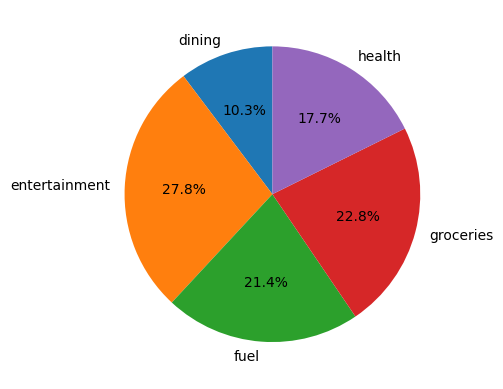

In [216]:
plt.pie(data,
        labels=labels,
        autopct='%1.1f%%',   # percentage inside
        startangle=90)
plt.savefig("charts/pie_chart.png")
plt.show()

In [217]:
df.head()

,Date,Category,Amount,Payment_Mode,month_name,day
0,2024-01-02,entertainment,9496.55,bank transfer,January,Tuesday
1,2024-01-03,rent,44615.69,upi,January,Wednesday
2,2024-01-04,entertainment,40773.26,debit card,January,Thursday
3,2024-01-05,entertainment,26641.36,upi,January,Friday
4,2024-01-06,utilities,31115.46,upi,January,Saturday


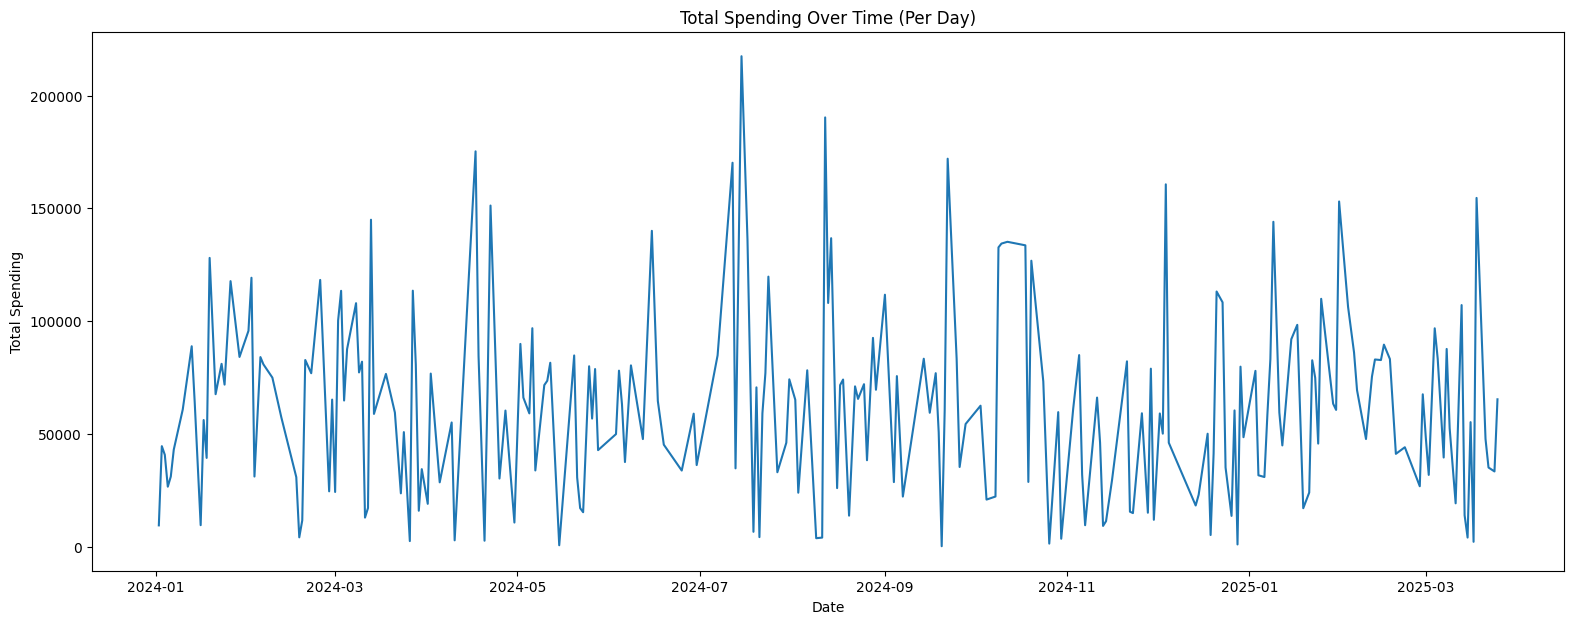

In [252]:
date_spending = df.groupby("Date")["Amount"].sum().sort_index()
plt.figure(figsize=(19,7))
plt.plot(date_spending.index, date_spending.values)
plt.xlabel("Date")
plt.ylabel("Total Spending")
plt.title("Total Spending Over Time (Per Day)")
plt.savefig("charts/line_chart")
plt.show()

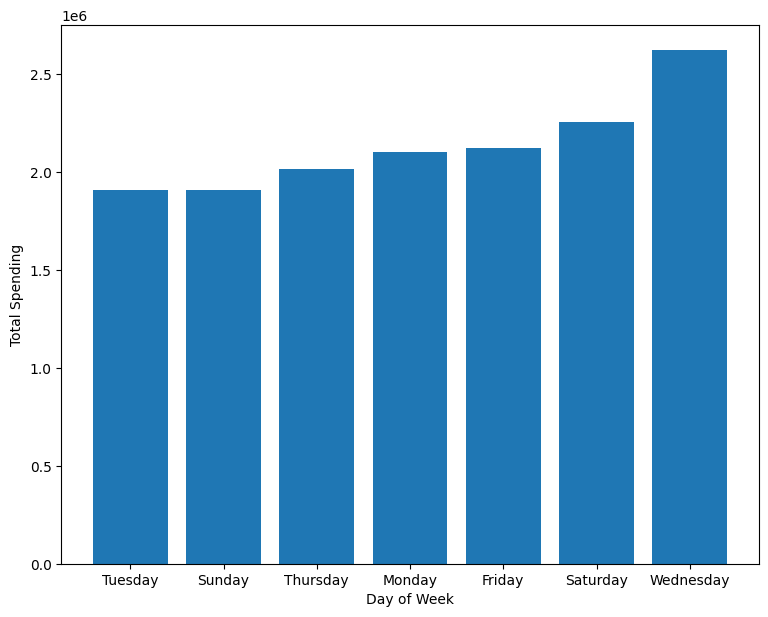

In [253]:
spend_day = df.groupby("day")["Amount"].sum().sort_values()
plt.figure(figsize=(9,7))
plt.bar(spend_day.index, spend_day.values)
plt.xlabel("Day of Week")
plt.ylabel("Total Spending")
plt.savefig("charts/bar_chart.png")
plt.show()